## Importing Required Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

---

## Dataset

---
## Data Analysis

In [30]:
income_data=pd.read_csv('/content/Hungry.csv')

In [ ]:
income_data.head()

,Unnamed: 0,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_binary
0,0,train-5856,4.6898,45.0,5.039216,1.013725,1256.0,2.462745,34.18,-118.33,0
1,1,train-2899,1.9125,35.0,2.926829,0.853659,477.0,11.634146,35.37,-119.01,0
2,2,train-6102,4.5221,36.0,5.267974,0.960784,446.0,2.915033,34.11,-117.89,0
3,3,train-8403,2.3675,29.0,2.900128,1.040973,3425.0,4.385403,33.94,-118.37,0
4,4,train-1665,5.7001,16.0,6.778195,1.003759,946.0,3.556391,38.02,-122.25,0


In [ ]:
income_data.shape

(40680, 11)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Number of rows and columns </span>
</div>

In [31]:
income_data.describe(include='O')

,id,target_binary
count,40680,40680
unique,40680,3
top,train-5856,?
freq,1,25200


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We can see how many unique values and frquecy of majority values in each categoical column are present.</span>
</div>

In [32]:
income_data.describe()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000,40680.000000
mean,20339.500000,4.861859,29.976205,5.760152,1.080953,1378.516839,2.817722,35.519977,-119.720725
std,11743.448812,2.347132,13.050585,2.498356,0.425685,1031.843240,7.402361,1.997559,2.005936
min,0.000000,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,10169.750000,3.202775,19.000000,4.666555,1.004577,779.000000,2.303929,33.940000,-122.010000
50%,20339.500000,4.471200,30.000000,5.572695,1.045660,1134.000000,2.669927,34.210000,-118.510000
75%,30509.250000,6.087800,39.000000,6.551532,1.090551,1643.000000,3.054241,37.590000,-118.100000
max,40679.000000,15.000100,52.000000,141.909091,34.066667,16122.000000,1243.333333,41.950000,-114.310000


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We can check standard deviation, mean and other values of all continous columns present in the dataset.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking DataType</h3></li></ul>
</div>

In [33]:
income_data.dtypes

,0
Unnamed: 0,int64
id,object
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64


<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [ ]:
income_data.isnull().sum()

,0
Unnamed: 0,0
id,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no null values</span>
</div>

In [ ]:
income_data.isna().sum()

,0
Unnamed: 0,0
id,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no NA values</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [27]:
Target_ratio=income_data['target_binary'].value_counts()/len(income_data)
print(Target_ratio)

target_binary
?    0.619469
0    0.294617
1    0.085914
Name: count, dtype: float64


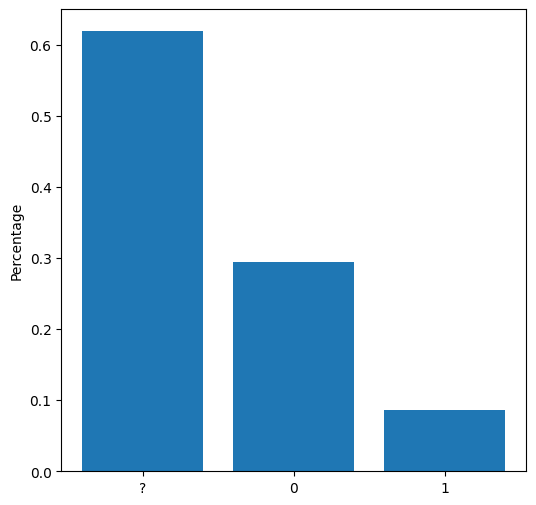

In [26]:
## Checking for data unbalance
plt.figure(figsize = (6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.show()

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has around 24% of entries where income is >50K</span>
</div>

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">There are two classes in this dataset</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Data</h3></li></ul>
</div>

In [36]:
X = income_data.drop(columns=['target_binary'])
y = income_data['target_binary']

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0,test_size=0.3)

---

## Naīve Bayes Training

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Assuming Data to be normally distributed we will apply the gaussian model and the data can also be fit into bernoulli model.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training Gaussian Naive Bayes</h3></li></ul>
</div>

In [38]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)

ValueError: could not convert string to float: 'train-13552'

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training Bernoulli Naive Bayes</h3></li></ul>
</div>

In [ ]:
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

---

## Accuracy Score

<div style="background-color:##EDF9FF">
  <ul><li><h3> Gaussian Naive Bayes</h3></li></ul>
</div>

In [ ]:
pred=gaussian_nb.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_gnb)

Accuracy Score:  0.7974204115057836


<div style="background-color:##EDF9FF">
  <ul><li><h3> Bernoulli Naive Bayes</h3></li></ul>
</div>

In [ ]:
pred=bernoulli_nb.predict(X_test)
acc_bnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_bnb)

Accuracy Score:  0.9986692599037773


<BarContainer object of 2 artists>

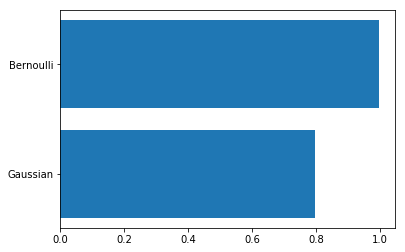

In [ ]:
plt.barh(['Gaussian','Bernoulli'],[acc_gnb,acc_bnb])

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">As you can see, Bernoulli has better accuracy than gaussian</span>
</div>